In [1]:
import scanpy as sc
import loompy as lp
import numpy as np
import pandas as pd
import torch
from scipy import sparse

In [2]:
import sys; sys.path.append("/home/shhsu/download/scClass")
import scClass
from scClass.main import Model

In [3]:
def dataset(file):
    return"../../../../scClass_dataset/human_thymic_development/"+file

path_h5ad  = dataset('hsc_selected.h5ad')

## Matrix Preparation

In [4]:
# more detail is on proprocessing_human_thymic_development
adata = sc.read_h5ad(path_h5ad)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
print('about',adata.shape[1],'gene, ',(adata.X.sum(axis=0)>0).sum(),'has been found in reference')

about 45468 gene,  33451 has been found in reference


## Label Preparation

In [6]:
trans_table = np.array([
['ETP',-1],
['Ery',8],
['HSC',12],
['MEMP',-2],
['Mast',-2],
['Mgk',9],
['NMP',10],
['T_DN',-1],
['pDC',11],
['proB',6],
])

In [7]:
anno = adata.obs['anno']
label = scClass.get_type_id(anno,trans_table)
label_y,label2 = np.unique(anno,return_inverse=True)

## Post Preparation

In [9]:
## 1.Transmodel(gene seq)
pass # since gene seq on hca data are the same 
## 2.(2)Simple normalization
adata2 = scClass.normalize_simple(adata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Classify

In [9]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass/scClass/data/model_train.pkl


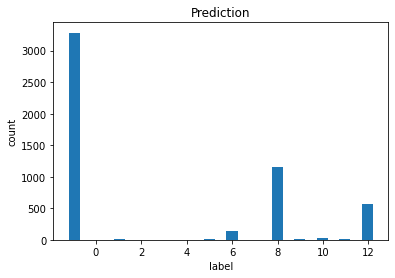

In [10]:
threshold = [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.9, 1.0, 1.0, 1.0, 1.0]
y_pred = scClass.predict_batch(adata2,model,threshold=threshold)

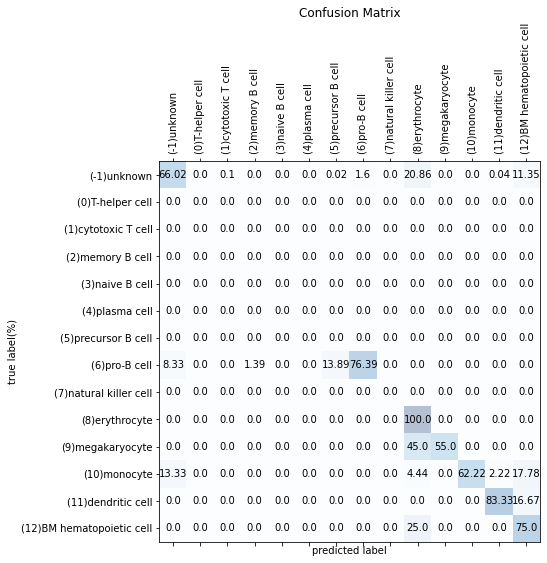

In [11]:
scClass.confusion_matrix(y_pred=y_pred,y_true=label,_filter=False)

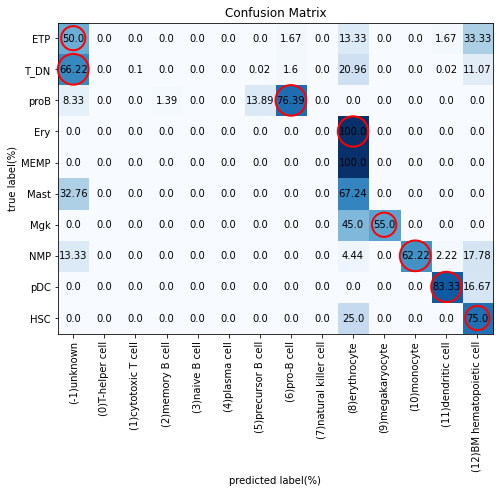

In [12]:
scClass.heatmap_matrix(y_pred=y_pred,y_true=label2,label_y=label_y,table=trans_table)